# CS 524

HW6 Sparsh Agarwal 9075905142

Q1.

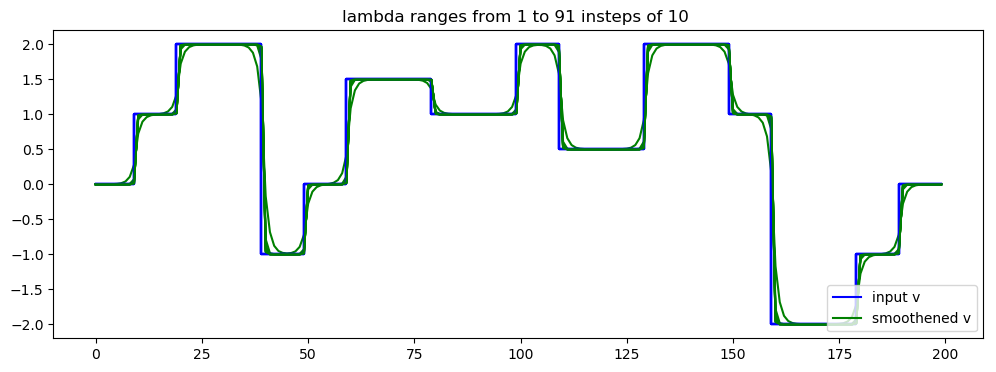

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


In [77]:
using JuMP, PyPlot
using Gurobi

raw = readcsv("voltages.csv");
v = raw[:];
S = length(v)

figure(figsize=(12,4))
for l =1:10:100
    m = Model(solver = GurobiSolver(OutputFlag=0))
    @variable(m, v_new[1:S])
    @expression(m, R, v_new[2:S]-v_new[1:S-1])
    @objective(m, Min, sum(R.^2) +l*sum((v_new-v).^2))
    solve(m)
    vnew = getvalue(v_new)

    step(v,"b-")
    plot(vnew,"g-")
    legend(["input v", "smoothened v"], loc="lower right")
    title(string("lambda ranges from 1 to 91 insteps of 10 "))
end

Q2. (a) var vector consists of variable x, y and z, the values cannot be found because Q is not a PSD.

In [218]:
using JuMP, PyPlot
using Gurobi

m = Model(solver = GurobiSolver(OutputFlag=0))
@variable(m, var[1:3])
Q =[2 4 -3
    4 2 -3
    -3 -3 9]
# @constraint(m, constr, var'*Q*var<=1)
# solve(m)
print(var'*Q*var)

2 var[1]² + 8 var[1]*var[2] + 2 var[2]² - 6 var[1]*var[3] - 6 var[2]*var[3] + 9 var[3]²

Q2. (b) Since U'U is not equal to Identity, Q is not orthogonal. As Q is not orthogonal, the set  (x, y, z) satisfying the constraint cannot be ellipsoid

In [216]:
(L,U) = eig(Q)
# print(L,U)
print(U * U')

[1.0 -8.32667e-17 1.11022e-16; -8.32667e-17 1.0 1.11022e-16; 1.11022e-16 1.11022e-16 1.0]

Q2. (c) v'A'Av - v'B'Bv <=1 , v'(A'A - B'B)v <=1 , A'A = U1L1U1' and B'B = -U2L2U2', also since A and B will be symmetrical. A^2 = U1L1U1' and B^2 = -U2L2U2'. Therefore A = U1L1.^0.5U1' and B = U2(-L2).^0.5U2'

In [236]:
(L,U) = eig(Q)
# println(L)
# println(U)
U1 = U[:, L.> 0]
Lambda1 = diagm(L[L.> 0])
# println(U1)
println(Lambda1)
# println(U1*Lambda1*U1')
U2 = U[:, L.< 0]
Lambda2 = diagm(L[L.< 0])
# println(U2)
println(Lambda2)
# println(U2*Lambda2*U2')
L1root = Lambda1.^0.5
L2root = (-Lambda2).^0.5
# println(L1root)
# println(L2root)
A = U1*L1root*U1'
B = U2*L2root*U2'
println(A)
println(B)

[3.0 0.0; 0.0 12.0]
[-2.0]
[1.1547 1.1547 -0.57735; 1.1547 1.1547 -0.57735; -0.57735 -0.57735 2.88675]
[0.707107 -0.707107 0.0; -0.707107 0.707107 0.0; 0.0 0.0 0.0]


Q2. (d) To find x,y,z which has arbitrary large magnitude, we just need to find a triplet that makes the expression on left negative. Once the expression is negative, we can scale all the values of triplet by an infinite factor and the expression on left would still remain negative, thus giving us an arbitrary large magnitude.

Q3. (a) Coeffecient values of the k=15 expression is large. The k=5 have comparitively smaller values

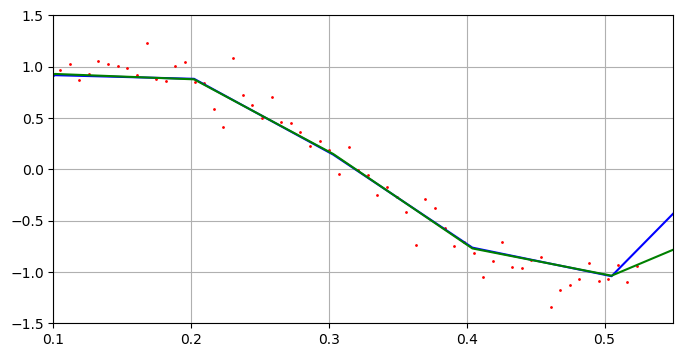

Academic license - for non-commercial use only
Academic license - for non-commercial use only
[-22.1164, 137.275, -37.3459, -44.7891, 13.8393, -0.0]
[-47453.1, 44832.5, 9439.23, -7063.82, -6079.69, -1631.37, 722.421, 941.585, 376.967, -49.5192, -114.623, 2.71912, 61.6909, -65.4154, 15.1807, -0.0]


In [94]:
using JuMP, Gurobi, PyPlot

raw = readcsv("lasso_data.csv");
x = raw[:,1];
y = raw[:,2];

k1 = 5
k2 = 15

n = length(x)

A1 = zeros(n,k1+1)
for i = 1:n
    for j = 1:k1+1
        A1[i,j] = x[i]^(k1+1-j);
    end
end

A2 = zeros(n,k2+1)
for i = 1:n
    for j = 1:k2+1
        A2[i,j] = x[i]^(k2+1-j);
    end
end

m1 = Model(solver=GurobiSolver(OutputFlag=0))
@variable(m1, u1[1:k1+1])
@constraint(m1, u1[k1+1] == 0)
@objective(m1, Min, sum( (y - A1*u1).^2 ) )

m2 = Model(solver=GurobiSolver(OutputFlag=0))
@variable(m2, u2[1:k2+1])
@constraint(m2, u2[k2+1] == 0)
@objective(m2, Min, sum( (y - A2*u2).^2 ) )

solve(m1)
solve(m2)

u1opt = getvalue(u1)
u2opt = getvalue(u2)
println(u1opt)
println(u2opt)

npts = 100
xfine = linspace(0,10,npts)
ff1ine = ones(npts)
ff2ine = ones(npts)
for j = 1:k1
    ff1ine = [ff1ine.*xfine ones(npts)]
end
for j = 1:k2
    ff2ine = [ff2ine.*xfine ones(npts)]
end

y1fine = ff1ine * u1opt
y2fine = ff2ine * u2opt

figure(figsize=(8,4))
plot( x, y, "r.", markersize=2)
plot( xfine, y1fine, "b-")
plot( xfine, y2fine, "g-")
axis([0.1,0.55,-1.5,1.5])
grid()

Q3. (b) The fit does not change much but the coeffecients reduced by significant amount.

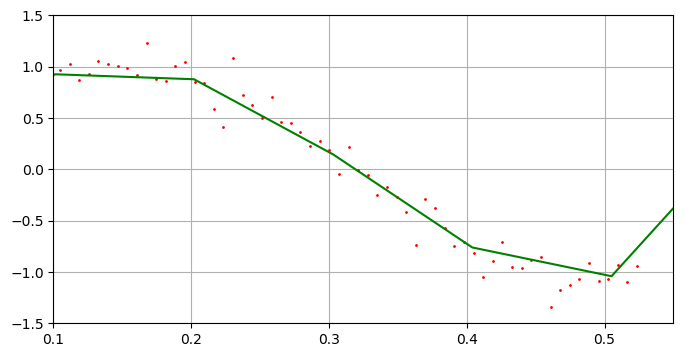

Academic license - for non-commercial use only
[-0.601569, -0.987435, -1.56934, -2.38544, -3.39725, -4.35898, -4.58587, -2.65146, 3.71614, 16.6521, 34.2242, 42.2149, 10.9939, -54.6637, 14.5239, -0.0]


In [95]:
using JuMP, Gurobi, PyPlot

raw = readcsv("lasso_data.csv");
x = raw[:,1];
y = raw[:,2];

# k1 = 5
k2 = 15

n = length(x)

# A1 = zeros(n,k1+1)
# for i = 1:n
#     for j = 1:k1+1
#         A1[i,j] = x[i]^(k1+1-j);
#     end
# end

A2 = zeros(n,k2+1)
for i = 1:n
    for j = 1:k2+1
        A2[i,j] = x[i]^(k2+1-j);
    end
end

# m1 = Model(solver=GurobiSolver(OutputFlag=0))
# @variable(m1, u1[1:k1+1])
# @constraint(m1, u1[k1+1] == 0)
# @objective(m1, Min, sum( (y - A1*u1).^2 ) )

m2 = Model(solver=GurobiSolver(OutputFlag=0))
@variable(m2, u2[1:k2+1])
@constraint(m2, u2[k2+1] == 0)
@objective(m2, Min, sum( (y - A2*u2).^2 )+0.000001*sum(u2.^2) )

# solve(m1)
solve(m2)

# u1opt = getvalue(u1)
u2opt = getvalue(u2)
# println(u1opt)
println(u2opt)

npts = 100
xfine = linspace(0,10,npts)
# ff1ine = ones(npts)
ff2ine = ones(npts)
# for j = 1:k1
#     ff1ine = [ff1ine.*xfine ones(npts)]
# end
for j = 1:k2
    ff2ine = [ff2ine.*xfine ones(npts)]
end

# y1fine = ff1ine * u1opt
y2fine = ff2ine * u2opt

figure(figsize=(8,4))
plot( x, y, "r.", markersize=2)
# plot( xfine, y1fine, "b-")
plot( xfine, y2fine, "g-")
axis([0.1,0.55,-1.5,1.5])
grid()

Q3. (c) If we have to use lasso regression then, we'll get a comparitively better fit at lamba=25, where error decreases as well as only one coeffient is zero(modulus<0.00001).

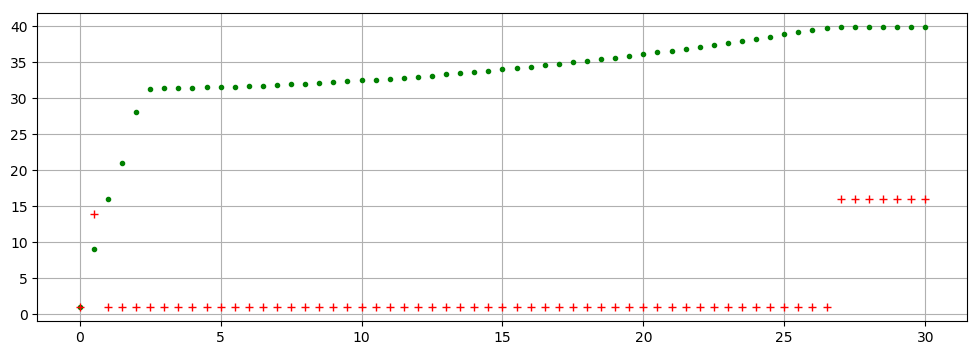

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

In [247]:
using JuMP, Gurobi, PyPlot
using Clp, NamedArrays

raw = readcsv("lasso_data.csv");
x = raw[:,1];
y = raw[:,2];

k2 = 15

n = length(x)

A2 = zeros(n,k2+1)
for i = 1:n
    for j = 1:k2+1
        A2[i,j] = x[i]^(k2+1-j);
    end
end

figure(figsize=(12,4))
# plot( x, y, "r.", markersize=2)
for l = 0:.5:30
    m2 = Model(solver=GurobiSolver(OutputFlag=0))
    @variable(m2, u2[1:k2+1])
    @variable(m2, x)
    @variable(m2, t[1:k2+1])
    @constraint(m2, u2-x .<= t )
    @constraint(m2, -t .<= u2-x )
    @constraint(m2, u2[k2+1] == 0)
    @objective(m2, Min, sum( (y - A2*u2).^2 )+l*sum(t) )

    status = solve(m2)

    u2opt = getvalue(u2)
#     println(u2opt)
#     println(getvalue(sum( (y - A2*u2).^2 )))

    npts = 100
    xfine = linspace(0,10,npts)
    ff2ine = ones(npts)
    for j = 1:k2
        ff2ine = [ff2ine.*xfine ones(npts)]
    end

    y2fine = ff2ine * u2opt
    
    count = 0
    for j = 1:k2+1
        if getvalue(u2[j])<=0.00001 && getvalue(u2[j])>=-0.00001
            count = count+1
        end
    end

#     plot( xfine, y2fine, "g-")
#     axis([0.001,100,-1.5,1.5])
    plot(l,getvalue(sum( (y - A2*u2).^2 )),"g.")
    plot(l,count,"r+")
#     println(count)
    
    grid()
end

